# Bike Sharing Analysis

Combined solutions for **Assignment I: Exploratory Data Analysis** and **Assignment II: Data Visualization** using the Washington D.C. bike rental dataset.

## Setup and Data Loading

This section imports the required libraries and loads the dataset. Make sure `train.csv` from the Kaggle Bike Sharing Demand competition is in the same folder as this notebook.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_theme()

df = pd.read_csv("/Users/nilofershaikh/Downloads/train.csv")

df['datetime'] = pd.to_datetime(df['datetime'])

## Assignment I: Exploratory Data Analysis

### 1–2. Basic Structure and Data Types

Inspect the structure of the dataframe, including data types, number of rows, and missing values.

In [5]:
# Display info about the dataframe, including data types
df.info()

# Print the number of rows in the dataset
print('Number of rows:', len(df))

# Check for missing values in each column
print('Missing values per column:')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
Number of rows: 10886
Missing values per column:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
at

### 3. Date-Derived Features

Create new columns for year, month, day of the week, and hour of the day based on the `datetime` column.

In [6]:
# Create additional time-based features from the datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['hour'] = df['datetime'].dt.hour

# Preview the updated dataframe
df[['datetime', 'year', 'month', 'dayofweek', 'hour']].head()

,datetime,year,month,dayofweek,hour
0,2011-01-01 00:00:00,2011,1,5,0
1,2011-01-01 01:00:00,2011,1,5,1
2,2011-01-01 02:00:00,2011,1,5,2
3,2011-01-01 03:00:00,2011,1,5,3
4,2011-01-01 04:00:00,2011,1,5,4


### 4. Season Labels

Map the numeric `season` codes to descriptive labels for better readability.

In [7]:
# Map numeric season codes to readable labels
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season_label'] = df['season'].map(season_map)

# Check the distribution of the new season_label column
df['season_label'].value_counts()

season_label
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

### 5. Total Casual and Registered Rentals by Year

Compute the total number of casual and registered rentals for each year.

In [8]:
# Group by year and sum the casual and registered rentals
year_totals = df.groupby('year')[['casual', 'registered']].sum()
year_totals

,casual,registered
year,,
2011,155817,626162
2012,236318,1067179


### 6. Mean Hourly Total Rentals by Season

Calculate the mean of the hourly total rentals (`count`) for each season and identify which season has the highest mean.

In [9]:
# Compute mean hourly total rentals for each season label
season_mean = df.groupby('season_label')['count'].mean().sort_values(ascending=False)
season_mean

season_label
fall      234.417124
summer    215.251372
winter    198.988296
spring    116.343261
Name: count, dtype: float64

### 7. Working vs Non-Working Days by User Type and Year

Compare mean rentals for registered and casual users on working and non-working days, and check if the pattern differs by year.

In [10]:
# Compute mean casual and registered rentals by year and workingday
working_means = df.groupby(['year', 'workingday'])[['casual', 'registered']].mean()
working_means

casual  registered
year workingday                       
2011 0           48.201276   97.153132
     1           19.664143  124.031909
2012 0           70.250286  160.767429
     1           30.527733  211.587507

### 8. Monthly Totals for Each Year

Identify which months in 2011 and 2012 have the highest and lowest total rentals.

In [11]:
# Total rentals per month for each year
month_totals = (
    df.groupby(['year', 'month'])['count']
      .sum()
      .reset_index()
)

# Month totals for 2011
month_2011 = month_totals[month_totals['year'] == 2011].sort_values('count', ascending=False)
month_2011


,year,month,count
6,2011,7,92848
5,2011,6,89776
7,2011,8,83296
4,2011,5,79713
9,2011,10,79522
8,2011,9,79104
10,2011,11,70889
11,2011,12,61183
3,2011,4,50517
2,2011,3,38735


In [12]:
# Month totals for 2012
month_2012 = month_totals[month_totals['year'] == 2012].sort_values('count', ascending=False)
month_2012

,year,month,count
20,2012,9,133425
17,2012,6,130957
19,2012,8,130220
21,2012,10,127912
18,2012,7,121769
16,2012,5,120434
15,2012,4,116885
22,2012,11,105551
23,2012,12,98977
14,2012,3,94766


### 9. Mean Rentals by Weather Category

Determine which weather category has the highest and lowest mean hourly total rentals.

In [13]:
# Mean total rentals by weather category
weather_mean = df.groupby('weather')['count'].mean().sort_values()
weather_mean

weather
3    118.846333
4    164.000000
2    178.955540
1    205.236791
Name: count, dtype: float64

### 10. Correlation with Total Rentals

Compute the correlation of `count` with all numerical columns and identify which variable is most strongly correlated.

In [14]:
# Select numerical columns and compute correlation matrix
num_cols = df.select_dtypes(include=[np.number])
corr_matrix = num_cols.corr()

# Correlation of all numerical features with count
corr_with_count = corr_matrix['count'].sort_values(ascending=False)
corr_with_count

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
workingday    0.011594
dayofweek    -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

### 11–12. Day Period Feature and Pivot Table

Create a categorical `day_period` variable from the hour of the day and build a pivot table of mean rentals by period and working day.

In [15]:
# Function to map hour to period of the day
def map_hour_to_period(h):
    if 0 <= h < 6:
        return 'night'
    elif 6 <= h < 12:
        return 'morning'
    elif 12 <= h < 18:
        return 'afternoon'
    else:
        return 'evening'

# Create day_period column
df['day_period'] = df['hour'].apply(map_hour_to_period)

# Pivot table: mean count by day_period and workingday
pivot_period_work = pd.pivot_table(
    df,
    values='count',
    index='day_period',
    columns='workingday',
    aggfunc='mean'
)
pivot_period_work

workingday,0,1
day_period,,
afternoon,371.022989,266.196141
evening,180.182759,251.054662
morning,157.772414,234.353763
night,44.052083,16.217582


## Assignment II: Data Visualization (Matplotlib + Seaborn)

### 1–2. Distributions of Numerical Variables

Plot histograms and box plots for all numerical columns to inspect their distributions and potential outliers.

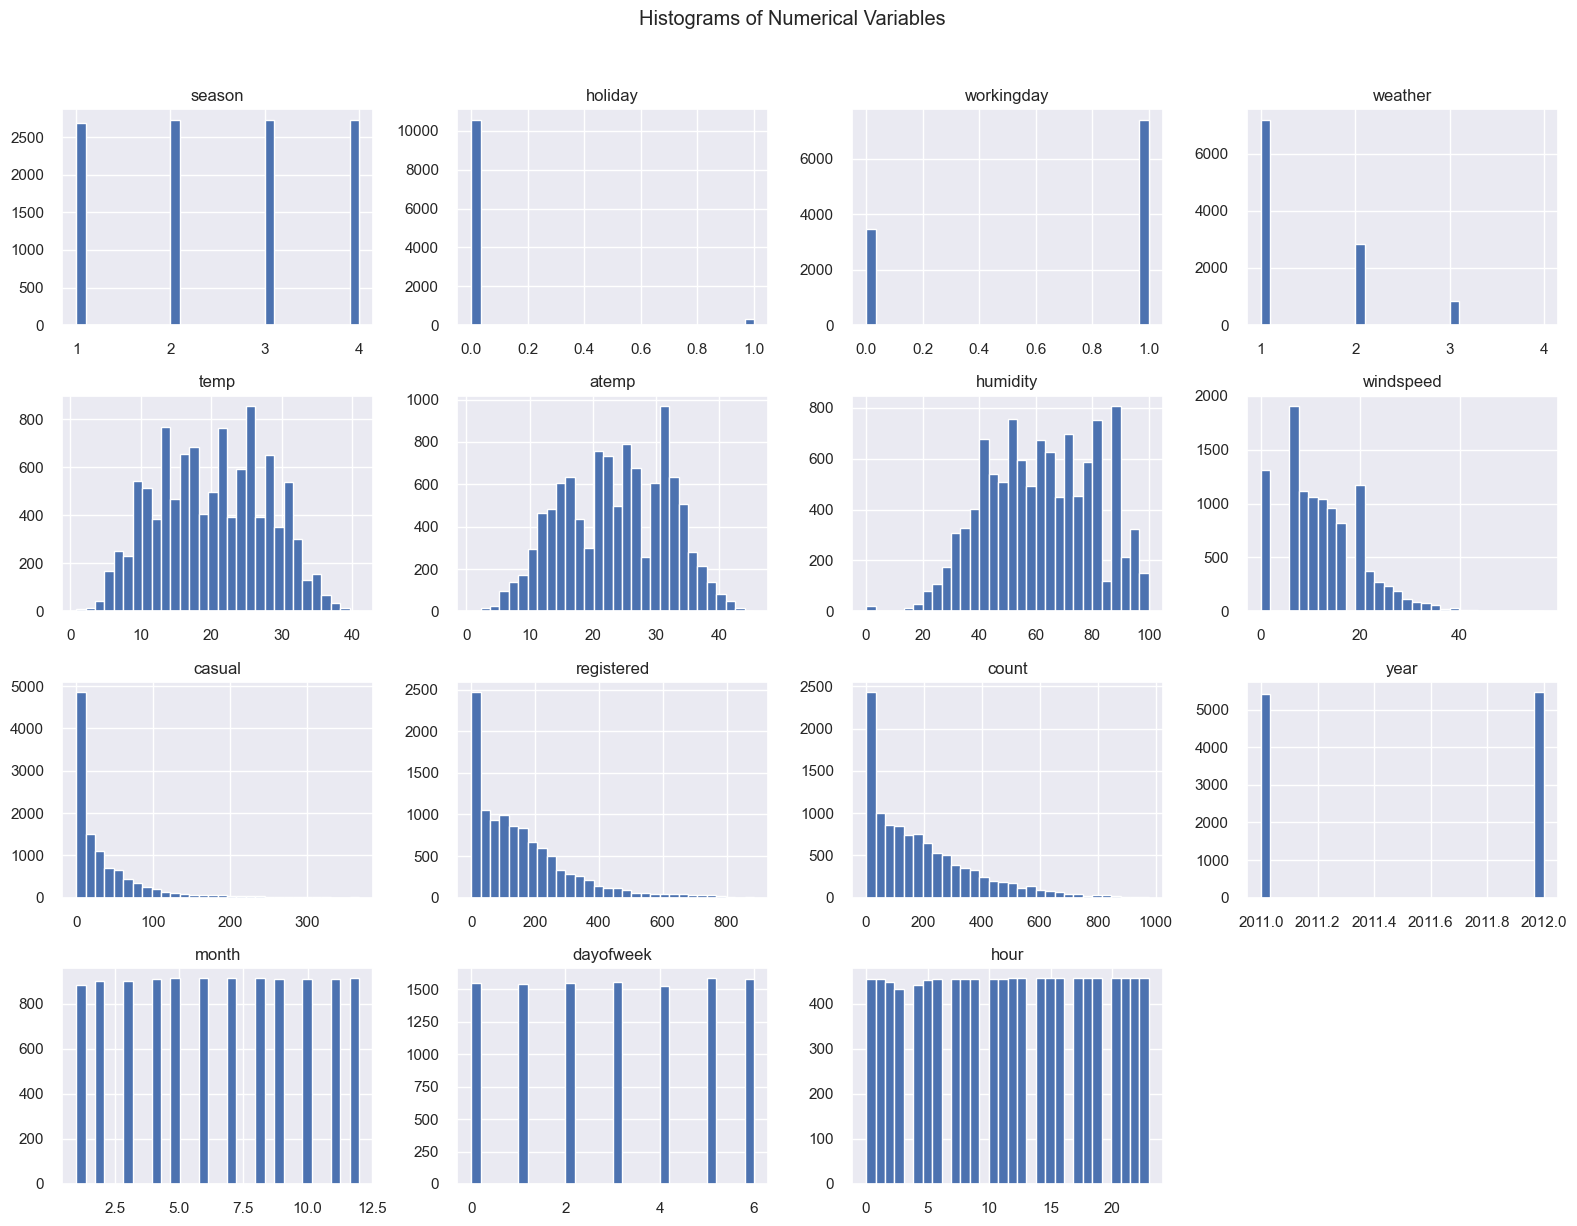

In [16]:
# List of numerical columns
numeric_cols = num_cols.columns

# Histograms for all numerical variables
df[numeric_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.tight_layout()

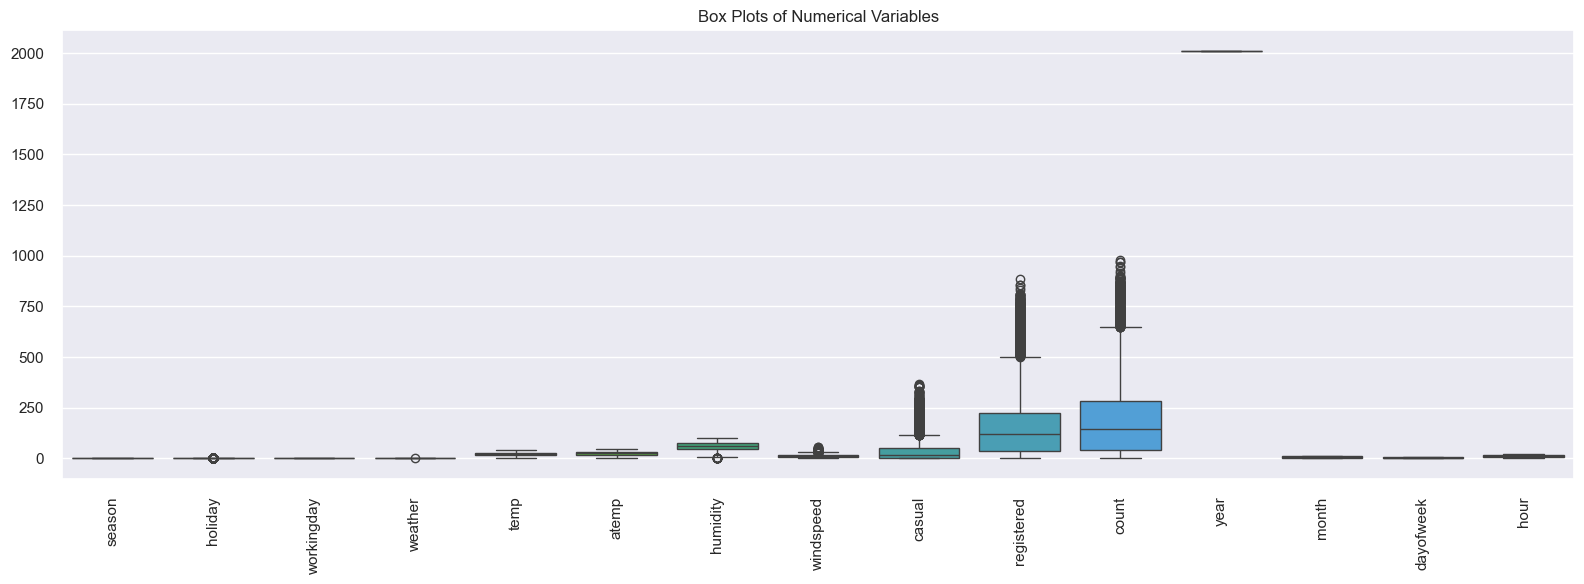

In [17]:
# Box plots for all numerical variables
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plots of Numerical Variables')
plt.xticks(rotation=90)
plt.tight_layout()

### 3. Mean Rentals for Working vs Non-Working Days

Visualize the mean hourly total rentals for working and non-working days.

/var/folders/ds/wp24kwrd7yj7k2kb6kz7_pd80000gn/T/ipykernel_18075/4255722140.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='workingday', y='count', estimator='mean', ci=95)


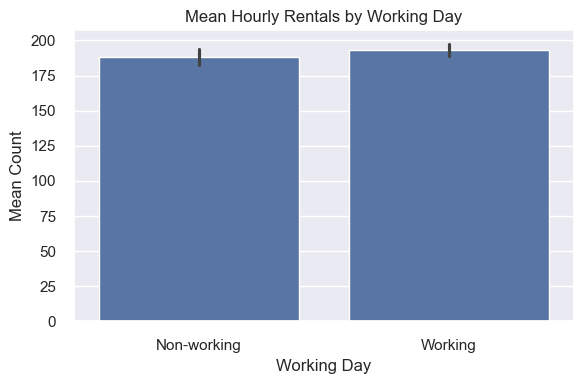

In [18]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='workingday', y='count', estimator='mean', ci=95)
plt.xticks([0, 1], ['Non-working', 'Working'])
plt.title('Mean Hourly Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Mean Count')
plt.tight_layout()

### 4–5. Mean Monthly Rentals (Combined and by Year)

Plot the mean hourly total rentals by month for both years combined and then separately in a multi-panel figure.

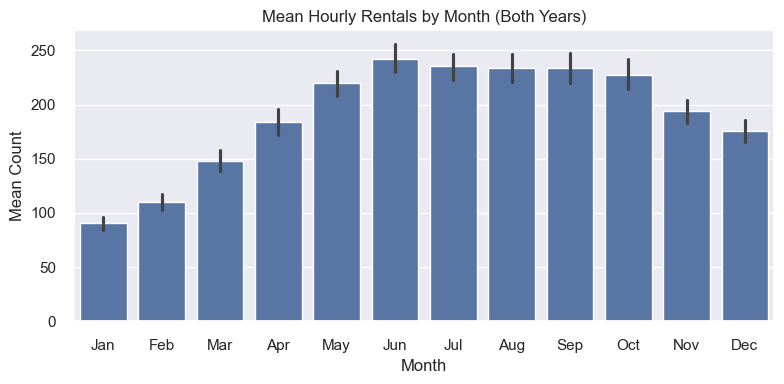

In [19]:
# Add month name for readability
df['month_name'] = df['datetime'].dt.strftime('%b')
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Mean rentals by month for both years combined
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df,
    x='month_name',
    y='count',
    estimator='mean',
    order=month_order
)
plt.title('Mean Hourly Rentals by Month (Both Years)')
plt.xlabel('Month')
plt.ylabel('Mean Count')
plt.tight_layout()

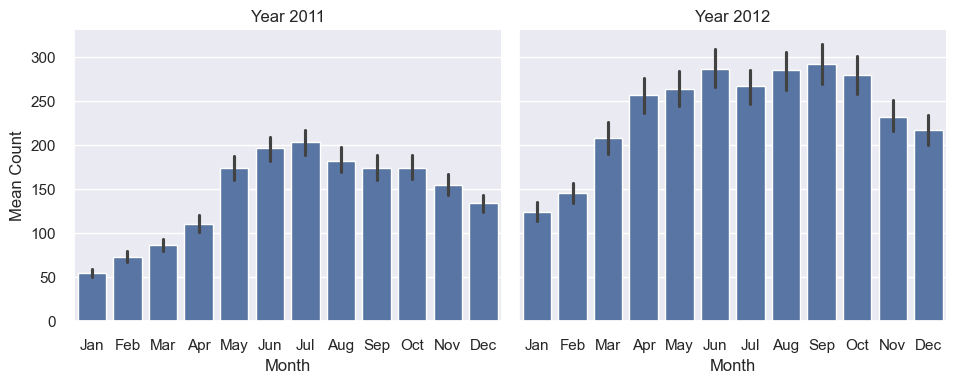

In [20]:
# Mean rentals by month for each year separately (multi-panel)
g = sns.catplot(
    data=df,
    x='month_name',
    y='count',
    col='year',
    kind='bar',
    estimator='mean',
    order=month_order,
    height=4,
    aspect=1.2
)
g.set_titles('Year {col_name}')
g.set_axis_labels('Month', 'Mean Count')
plt.tight_layout()

### 6. Mean Rentals and 95% CI by Weather Category

Plot the mean hourly rentals and 95% confidence intervals for each weather category.

/var/folders/ds/wp24kwrd7yj7k2kb6kz7_pd80000gn/T/ipykernel_18075/3425609511.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(


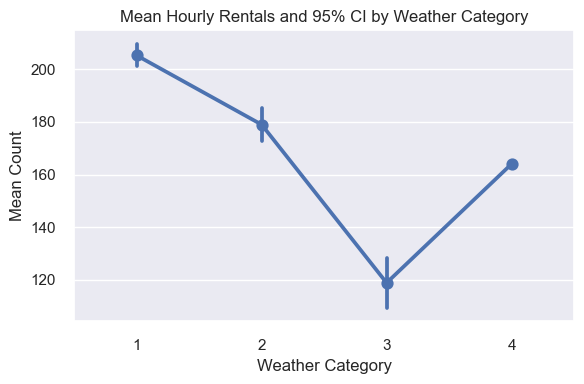

In [21]:
plt.figure(figsize=(6, 4))
sns.pointplot(
    data=df,
    x='weather',
    y='count',
    ci=95,
    dodge=True
)
plt.title('Mean Hourly Rentals and 95% CI by Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Mean Count')
plt.tight_layout()

### 7–9. Hourly Rental Profiles

Examine how mean hourly rentals vary by hour of day, day of the week, and season.

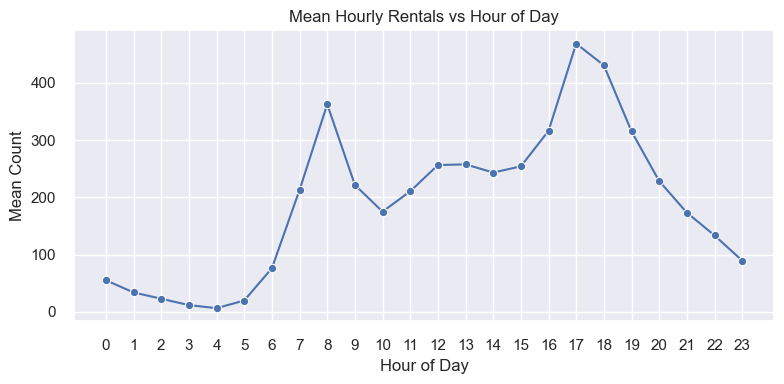

In [22]:
# 7) Mean rentals by hour of the day
mean_by_hour = df.groupby('hour')['count'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(data=mean_by_hour, x='hour', y='count', marker='o')
plt.title('Mean Hourly Rentals vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Count')
plt.xticks(range(0, 24))
plt.tight_layout()

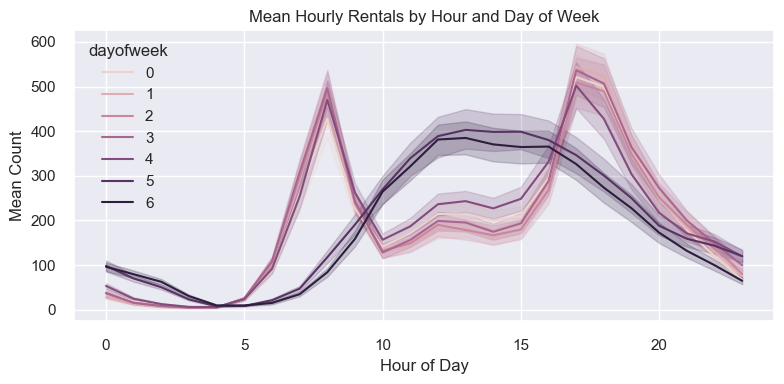

In [23]:
# 8) Mean rentals by hour and day of week
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=df,
    x='hour',
    y='count',
    hue='dayofweek',
    estimator='mean',
    errorbar='ci'
)
plt.title('Mean Hourly Rentals by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Count')
plt.tight_layout()

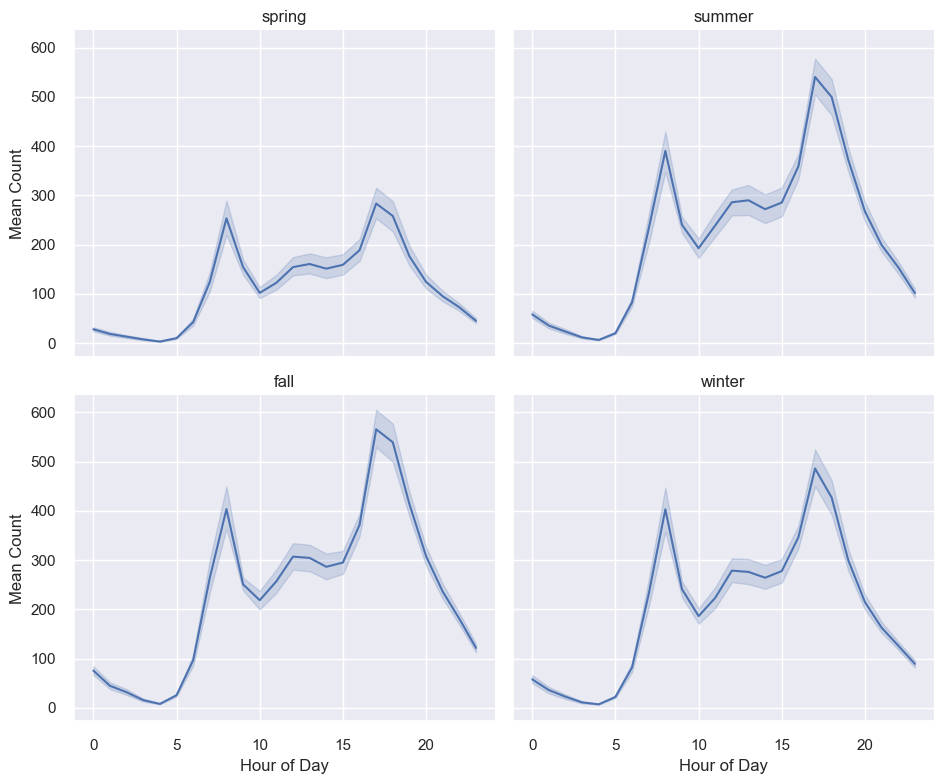

In [24]:
# 9) Mean rentals by hour and season (multi-panel)
g = sns.relplot(
    data=df,
    x='hour',
    y='count',
    col='season_label',
    kind='line',
    estimator='mean',
    errorbar='ci',
    col_wrap=2,
    height=4,
    aspect=1.2
)
g.set_titles('{col_name}')
g.set_axis_labels('Hour of Day', 'Mean Count')
plt.tight_layout()

### 10. Rentals by Period of Day and Working Day

Plot the mean hourly rentals and 95% confidence intervals for each period of the day, split by working and non-working days.

/var/folders/ds/wp24kwrd7yj7k2kb6kz7_pd80000gn/T/ipykernel_18075/2529528871.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(


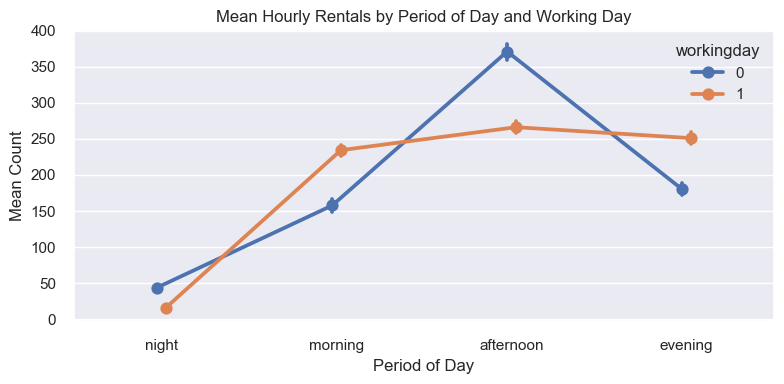

In [25]:
plt.figure(figsize=(8, 4))
sns.pointplot(
    data=df,
    x='day_period',
    y='count',
    hue='workingday',
    order=['night', 'morning', 'afternoon', 'evening'],
    ci=95,
    dodge=True
)
plt.title('Mean Hourly Rentals by Period of Day and Working Day')
plt.xlabel('Period of Day')
plt.ylabel('Mean Count')
plt.tight_layout()

### 11. Correlation Heatmap of Numerical Variables

Display a heatmap of the correlation matrix for all numerical variables in the dataset.

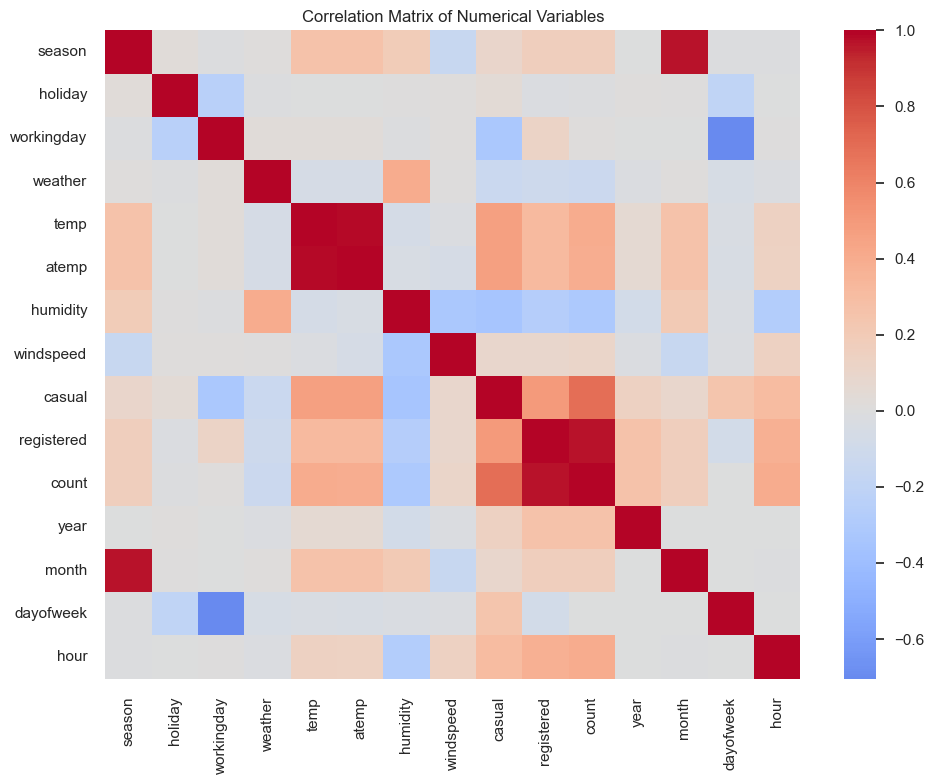

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0
)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()